# Commercial Flight Analysis & Prediction

Datasets: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7

In [1]:
# import basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os

In [2]:
#import datasets
df_06 = pd.read_csv('2006.csv')
df_07 = pd.read_csv('2007.csv')
df = pd.concat([df_06, df_07], ignore_index=True)
#set display option
pd. set_option("display.max_columns", None)

## Data Understanding

In [3]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14595132,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,N670DN,111.0,91.0,80.0,13.0,-7.0,MCO,ATL,403,14,17,0,NaN,0,0,0,0,0,0
14595133,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,N829MH,248.0,254.0,221.0,5.0,11.0,ATL,SLC,1589,6,21,0,NaN,0,0,0,0,0,0
14595134,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,N623DL,266.0,250.0,233.0,15.0,-1.0,LAX,ATL,1946,14,19,0,NaN,0,0,0,15,0,0
14595135,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,N970DL,125.0,127.0,100.0,36.0,38.0,DFW,ATL,732,11,14,0,NaN,0,0,0,0,0,36


**ActualElapsedTime = AirTime + TaxiIn + TaxiOut**

In [4]:
#check dimension
df.shape

(14595137, 29)

In [5]:
df.info() #null_counts=True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14595137 entries, 0 to 14595136
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay    

**Data Cleaning**

In [6]:
#check for any duplicates 
df.duplicated(keep=False).any()

True

In [7]:
df[df.duplicated(keep=False)] #keep=false -> it consider all of the same values as duplicates. 

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
752507,2006,2,20,1,1204.0,1157,1244.0,1240,OO,6117,N297SW,40.0,43.0,28.0,4.0,7.0,PSP,LAX,110,3,9,0,NaN,0,0,0,0,0,0
752508,2006,2,20,1,1204.0,1157,1244.0,1240,OO,6117,N297SW,40.0,43.0,28.0,4.0,7.0,PSP,LAX,110,3,9,0,NaN,0,0,0,0,0,0
888039,2006,2,19,7,821.0,730,948.0,850,FL,768,N956AT,87.0,80.0,50.0,58.0,51.0,PHL,BOS,280,15,22,0,NaN,0,0,0,7,0,51
888040,2006,2,19,7,821.0,730,948.0,850,FL,768,N956AT,87.0,80.0,50.0,58.0,51.0,PHL,BOS,280,15,22,0,NaN,0,0,0,7,0,51
1039372,2006,2,24,5,913.0,919,NaN,1054,AS,152,N746AS,NaN,95.0,NaN,NaN,-6.0,ANC,OME,539,0,17,0,NaN,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13724875,2007,11,18,7,2054.0,2050,2341.0,2346,F9,282,N950FR,107.0,116.0,94.0,-5.0,4.0,DEN,STL,770,4,9,0,NaN,0,0,0,0,0,0
14337283,2007,12,20,4,1712.0,1705,1926.0,1931,F9,449,N950FR,254.0,266.0,233.0,-5.0,7.0,PHL,DEN,1557,7,14,0,NaN,0,0,0,0,0,0
14337284,2007,12,20,4,1712.0,1705,1926.0,1931,F9,449,N950FR,254.0,266.0,233.0,-5.0,7.0,PHL,DEN,1557,7,14,0,NaN,0,0,0,0,0,0
14337285,2007,12,20,4,2034.0,2035,2335.0,2336,F9,214,N950FR,121.0,121.0,101.0,-1.0,-1.0,DEN,AUS,775,6,14,0,NaN,0,0,0,0,0,0


In [8]:
#drop duplicated data
df = df.drop_duplicates(keep='first')

In [9]:
df.shape #34 rows are dropped

(14595103, 29)

In [10]:
#check for missing values
def missing_data(df):
    miss1 = pd.DataFrame(df.isnull().sum()).reset_index()
    miss1.columns = ['Columns', 'Nbr of Miss']
    miss2 = pd.DataFrame(df.isnull().sum()/df.shape[0]*100).reset_index()
    miss2.columns = ['Columns', 'Perc of Miss']
    miss = miss1.merge(miss2, how='inner', on='Columns')
    return miss[miss['Nbr of Miss']!=0]

In [11]:
missing_data(df)

,Columns,Nbr of Miss,Perc of Miss
4,DepTime,282682,1.936828
6,ArrTime,316046,2.165425
10,TailNum,22,0.000151
11,ActualElapsedTime,316046,2.165425
12,CRSElapsedTime,998,0.006838
13,AirTime,316046,2.165425
14,ArrDelay,316046,2.165425
15,DepDelay,282682,1.936828
22,CancellationCode,14312420,98.063165


In [12]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.459510e+07,1.459510e+07,1.459510e+07,1.459510e+07,1.431242e+07,1.459510e+07,1.427906e+07,1.459510e+07,1.459510e+07,1.427906e+07,1.459410e+07,1.427906e+07,1.427906e+07,1.431242e+07,1.459510e+07,1.459510e+07,1.459510e+07,1.459510e+07,1.459510e+07,1.459510e+07,1.459510e+07,1.459510e+07,1.459510e+07,1.459510e+07
mean,2.006511e+03,6.538310e+00,1.572820e+01,3.941700e+00,1.339795e+03,1.331404e+03,1.484467e+03,1.495574e+03,2.187450e+03,1.261937e+02,1.272180e+02,1.028348e+02,9.451854e+00,1.075881e+01,7.238139e+02,6.872858e+00,1.602864e+01,1.936828e-02,2.285972e-03,3.635700e+00,7.258251e-01,3.686946e+00,2.728840e-02,4.813307e+00
std,4.998863e-01,3.425111e+00,8.783865e+00,1.992109e+00,4.782154e+02,4.636536e+02,5.040895e+02,4.801638e+02,1.980505e+03,7.124870e+01,7.033694e+01,7.238267e+01,3.800009e+01,3.487779e+01,5.683354e+02,2.208142e+01,1.156533e+01,1.378156e-01,4.775716e-02,1.987076e+01,9.085732e+00,1.591086e+01,1.183343e+00,2.059820e+01
min,2.006000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,-1.240000e+03,-1.425000e+03,-5.920000e+02,-1.200000e+03,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.006000e+03,4.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.300000e+02,1.108000e+03,1.115000e+03,5.870000e+02,7.500000e+01,7.700000e+01,5.400000e+01,-9.000000e+00,-4.000000e+00,3.170000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.007000e+03,7.000000e+00,1.600000e+01,4.000000e+00,1.329000e+03,1.324000e+03,1.515000e+03,1.520000e+03,1.501000e+03,1.080000e+02,1.090000e+02,8.400000e+01,-1.000000e+00,0.000000e+00,5.690000e+02,5.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.007000e+03,1.000000e+01,2.300000e+01,6.000000e+00,1.732000e+03,1.720000e+03,1.911000e+03,1.906000e+03,3.499000e+03,1.560000e+02,1.570000e+02,1.310000e+02,1.300000e+01,1.000000e+01,9.510000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.007000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2.930000e+03,2.359000e+03,2.955000e+03,2.400000e+03,9.619000e+03,1.879000e+03,1.430000e+03,1.958000e+03,2.598000e+03,2.601000e+03,4.962000e+03,1.501000e+03,6.020000e+02,1.000000e+00,1.000000e+00,2.580000e+03,1.429000e+03,1.392000e+03,3.820000e+02,1.366000e+03


In [13]:
df2 = df[df['Cancelled'] == 0]

In [14]:
df2['ActualElapsedTime'].isna().sum()

33364

In [15]:
df2[~df2['ActualElapsedTime'].isna()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14595132,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,N670DN,111.0,91.0,80.0,13.0,-7.0,MCO,ATL,403,14,17,0,NaN,0,0,0,0,0,0
14595133,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,N829MH,248.0,254.0,221.0,5.0,11.0,ATL,SLC,1589,6,21,0,NaN,0,0,0,0,0,0
14595134,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,N623DL,266.0,250.0,233.0,15.0,-1.0,LAX,ATL,1946,14,19,0,NaN,0,0,0,15,0,0
14595135,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,N970DL,125.0,127.0,100.0,36.0,38.0,DFW,ATL,732,11,14,0,NaN,0,0,0,0,0,36


In [16]:
df2 = df2.dropna(subset=['ActualElapsedTime'])

In [17]:
df2.isna().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                     0
CRSDepTime                  0
ArrTime                     0
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                     0
ActualElapsedTime           0
CRSElapsedTime              0
AirTime                     0
ArrDelay                    0
DepDelay                    0
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     14279056
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
dtype: int64

In [18]:
df2.shape

(14279057, 29)

In [19]:
#see why there's cancellationcode even though cancelled == 0
df2[~df2['CancellationCode'].isna()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
14540614,2007,12,16,7,1502.0,1435,1616.0,1553,B6,74,N594JB,74.0,78.0,42.0,23.0,27.0,JFK,BTV,267,3,29,0,B,0,0,8,0,0,15


In [20]:
#drop CancellationCode column and index 14540614
df2.drop(['CancellationCode', 'Cancelled', 'Diverted'], axis=1, inplace=True)
df2.drop([14540614], inplace=True)
#reset index
df2.reset_index(inplace=True)
df2.drop('index', axis = 1, inplace = True)

In [21]:
df2

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14279051,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,N670DN,111.0,91.0,80.0,13.0,-7.0,MCO,ATL,403,14,17,0,0,0,0,0
14279052,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,N829MH,248.0,254.0,221.0,5.0,11.0,ATL,SLC,1589,6,21,0,0,0,0,0
14279053,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,N623DL,266.0,250.0,233.0,15.0,-1.0,LAX,ATL,1946,14,19,0,0,15,0,0
14279054,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,N970DL,125.0,127.0,100.0,36.0,38.0,DFW,ATL,732,11,14,0,0,0,0,36


In [34]:
df2.to_csv(r'C:\Users\USER\Desktop\uni\coursework_flight.csv', index = False, header = True)

## When is the best time of day, day of the week, and time of the year to fly to minimise delays?

In [16]:
cnn = sqlite3.connect('coursework2.db')

In [18]:
#df.to_sql('flight', cnn)
#load sql module
%load_ext sql

In [19]:
#connect to database
%sql sqlite:///coursework2.db

In [21]:
ranges = np.arange(0, 2500, 100).tolist()
df2.groupby(pd.cut(df2['DepTime'], bins=ranges)).size().reset_index(name='count')

,DepTime,count
0,"(0, 100]",47763
1,"(100, 200]",13560
2,"(200, 300]",4250
3,"(300, 400]",1333
4,"(400, 500]",6542
5,"(500, 600]",282183
6,"(600, 700]",925100
7,"(700, 800]",898410
8,"(800, 900]",946827
9,"(900, 1000]",888135


In [22]:
ranges = np.arange(0, 2500, 100).tolist()
DelayTime = df2.groupby(pd.cut(df2.DepTime, ranges))['ArrDelay'].mean()
DelayTime = pd.DataFrame(DelayTime).reset_index()
DelayTime

,DepTime,ArrDelay
0,"(0, 100]",57.405670
1,"(100, 200]",87.234292
2,"(200, 300]",105.358588
3,"(300, 400]",118.990248
4,"(400, 500]",5.095078
5,"(500, 600]",-5.030544
6,"(600, 700]",-2.433248
7,"(700, 800]",-0.469506
8,"(800, 900]",1.218118
9,"(900, 1000]",3.217176


<AxesSubplot:>

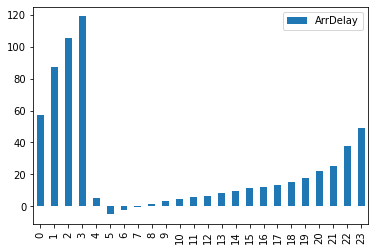

In [23]:
#AVERAGE DELAY PER DAY TIME
DelayTime.plot(kind='bar')

In [25]:
#BEST TIME OF DAY TO FLY
%%sql 
SELECT DayOfWeek, AVG(ArrDelay) AS 'AvgArrDelay'
FROM flight
WHERE Cancelled = 0 & ActualElapsedTime IS NOT NULL
GROUP BY DayOfWeek
ORDER BY AvgArrDelay  

 * sqlite:///coursework2.db
Done.


DayOfWeek,AvgArrDelay
6,5.5133382462947464
2,7.248419166623037
3,8.987948659454657
7,9.247210060095604
1,9.701697022117296
4,12.14154597844674
5,12.701591919153572


In [27]:
delayDay = pd.DataFrame(df2.groupby(['Year', 'DayOfWeek'])['ArrDelay'].mean())
delayDay

ArrDelay
Year DayOfWeek           
2006 1           8.842544
     2           6.195178
     3           7.977166
     4          11.575170
     5          12.320509
     6           5.169092
     7           8.139225
2007 1          10.513626
     2           8.263684
     3           9.962946
     4          12.686026
     5          13.067707
     6           5.846600
     7          10.329593

In [28]:
df2.groupby('DayOfWeek')['ArrDelay'].mean()

DayOfWeek
1     9.701697
2     7.248419
3     8.987949
4    12.141546
5    12.701592
6     5.513338
7     9.247203
Name: ArrDelay, dtype: float64

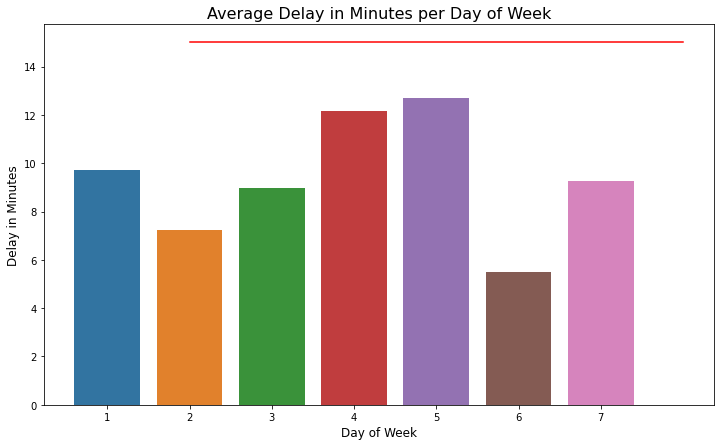

In [29]:
delayDay = pd.DataFrame(df2.groupby('DayOfWeek')['ArrDelay'].mean())
f,ax = plt.subplots(figsize=(12,7))

sns.set_color_codes('muted')
sns.barplot(x=delayDay.index, y=delayDay['ArrDelay'], data=delayDay)
sns.lineplot(x=delayDay.index, y=15, color='red') #delay cap
plt.title(label='Average Delay in Minutes per Day of Week', fontsize= 16)
plt.ylabel("Delay in Minutes", fontsize=12)
plt.xlabel("Day of Week", fontsize=12)

plt.savefig('AvgDelayperDayofWeek.png', transparent = True)

This chart shows that an average delay for all US carriers is below the 15 minutes cap. and Friday has the highest delay

In [30]:
round(df2[df2['ArrDelay']>0].groupby('DayOfWeek')['CarrierDelay', 'WeatherDelay', 'NASDelay', 
                                                                    'SecurityDelay', 'LateAircraftDelay'].mean(),2)

<ipython-input-30-efc4c97fe311>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  round(df2[df2['ArrDelay']>0].groupby('DayOfWeek')['CarrierDelay', 'WeatherDelay', 'NASDelay',


,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
DayOfWeek,,,,,
1,7.99,1.61,8.00,0.05,10.86
2,7.27,1.45,8.38,0.04,9.24
3,7.28,1.66,8.59,0.06,10.28
4,7.69,1.72,9.25,0.09,11.69
5,8.14,1.59,8.65,0.05,11.77
6,9.09,1.39,5.65,0.07,8.70
7,8.61,1.67,7.40,0.06,10.60


In [31]:
delayDayReason = pd.DataFrame(round(df2[df2['ArrDelay']>0].groupby('DayOfWeek')['CarrierDelay', 'WeatherDelay', 'NASDelay',
                                                                                'SecurityDelay', 'LateAircraftDelay'].mean(),2))
delayDayReason = delayDayReason.reset_index()
delayDayReason = round(delayDayReason.set_index('DayOfWeek').apply(lambda x: (x / x.sum())*100, axis=1), 0)
delayDayReason

<ipython-input-31-a71d9b9aa051>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  delayDayReason = pd.DataFrame(round(df2[df2['ArrDelay']>0].groupby('DayOfWeek')['CarrierDelay', 'WeatherDelay', 'NASDelay',


,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
DayOfWeek,,,,,
1,28.0,6.0,28.0,0.0,38.0
2,28.0,5.0,32.0,0.0,35.0
3,26.0,6.0,31.0,0.0,37.0
4,25.0,6.0,30.0,0.0,38.0
5,27.0,5.0,29.0,0.0,39.0
6,37.0,6.0,23.0,0.0,35.0
7,30.0,6.0,26.0,0.0,37.0


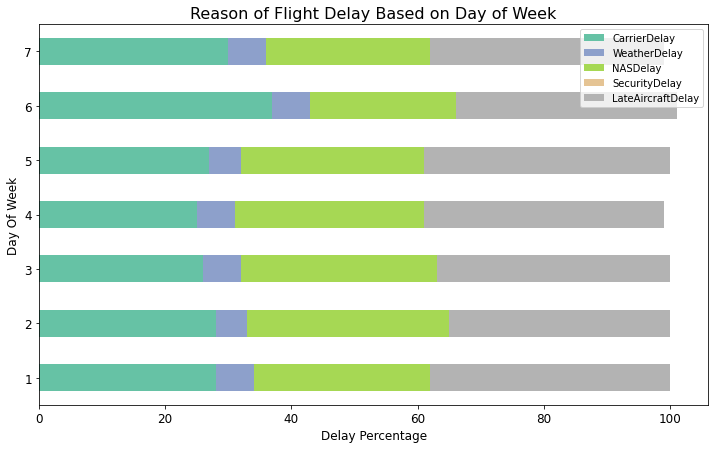

In [32]:
delayDayReason.plot(kind='barh', figsize=(12,7), stacked=True, fontsize=12, colormap='Set2');
plt.title('Reason of Flight Delay Based on Day of Week', fontsize=16);
plt.xlabel('Delay Percentage', fontsize = 12)
plt.ylabel('Day Of Week', fontsize = 12)
plt.legend(loc =1);

plt.savefig('ReasonAvgDelayperDayofWeek.png', transparent = True)

In [33]:
#BEST TIME OF DATE TO FLY
%%sql 
SELECT DayofMonth, AVG(ArrDelay) as 'AvgArrDelay'
FROM flight
WHERE Cancelled = 0 & ActualElapsedTime IS NOT NULL
GROUP BY DayofMonth
ORDER BY AvgArrDelay

 * sqlite:///coursework2.db
Done.


DayofMonth,AvgArrDelay
8,6.079172417296767
9,6.642180523584885
6,6.707354962186043
4,6.743400457073865
7,7.320193048884823
31,8.088920228274134
3,8.502308288885
5,8.574785947753607
24,8.690940638080985
10,8.787667836476354


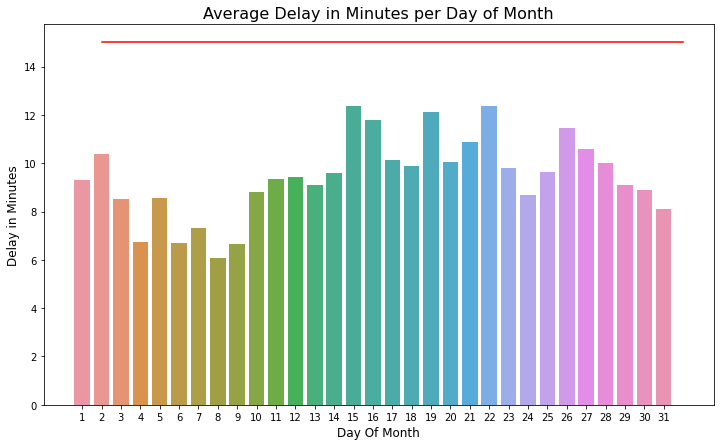

In [34]:
delayDate = pd.DataFrame(df2.groupby('DayofMonth')['ArrDelay'].mean())
f,ax = plt.subplots(figsize=(12,7))

sns.set_color_codes('muted')
sns.barplot(x=delayDate.index, y=delayDate['ArrDelay'], data=delayDate)
sns.lineplot(x=delayDate.index, y=15, color='red') #delay cap
plt.title(label='Average Delay in Minutes per Day of Month', fontsize= 16)
plt.ylabel("Delay in Minutes", fontsize=12)
plt.xlabel("Day Of Month", fontsize=12)

plt.savefig('AvgDelayperDayofMonth.png', transparent = True)

In [35]:
#BEST TIME OF MONTH TO FLY
%%sql 
SELECT Month, AVG(ArrDelay) as 'AvgArrDelay'
FROM flight
WHERE Cancelled = 0 & ActualElapsedTime IS NOT NULL
GROUP BY Month
ORDER BY AvgArrDelay 

 * sqlite:///coursework2.db
Done.


Month,AvgArrDelay
11,6.002441293911336
9,6.034476787150247
5,6.964126635636409
1,7.447214206059368
4,7.491780328549577
10,8.559237812195628
3,9.027273384284605
2,10.498487500484623
8,10.662704904004668
7,12.737076919483311


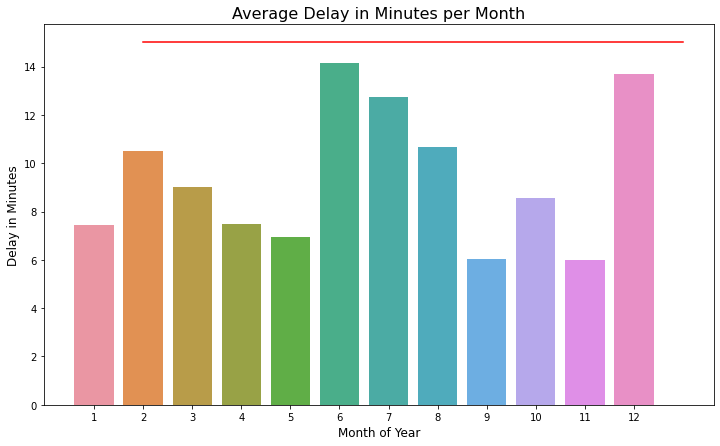

In [36]:
delayMonth = pd.DataFrame(df2.groupby('Month')['ArrDelay'].mean())
f,ax = plt.subplots(figsize=(12,7))

sns.set_color_codes('muted')
sns.barplot(x=delayMonth.index, y=delayMonth['ArrDelay'], data=delayMonth)
sns.lineplot(x=delayMonth.index, y=15, color='red') #delay cap
plt.title(label='Average Delay in Minutes per Month', fontsize= 16)
plt.ylabel("Delay in Minutes", fontsize=12)
plt.xlabel("Month of Year", fontsize=12)

plt.savefig('AvgDelayperMonth.png', transparent = True)

In [37]:
round(df2[df2['ArrDelay']>0].groupby('Month')['CarrierDelay', 'WeatherDelay', 'NASDelay', 
                                                                    'SecurityDelay', 'LateAircraftDelay'].mean(),2)

<ipython-input-37-35405b4dd0bf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  round(df2[df2['ArrDelay']>0].groupby('Month')['CarrierDelay', 'WeatherDelay', 'NASDelay',


,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Month,,,,,
1,7.54,1.65,7.78,0.04,9.39
2,8.26,1.89,7.75,0.07,10.64
3,7.85,1.30,7.76,0.06,10.56
4,7.20,1.13,7.54,0.07,9.70
5,6.85,1.32,7.50,0.04,9.19
6,8.92,2.30,9.08,0.05,12.64
7,9.10,2.03,8.26,0.06,12.55
8,8.60,1.68,7.95,0.14,11.43
9,7.46,1.36,7.93,0.05,8.83


In [39]:
delayMonthReason = pd.DataFrame(round(df2[df2['ArrDelay']>0].groupby('Month')['CarrierDelay', 'WeatherDelay', 'NASDelay', 
                                                                    'SecurityDelay', 'LateAircraftDelay'].mean(),2))
delayMonthReason = delayMonthReason.reset_index()
delayMonthReason = round(delayMonthReason.set_index('Month').apply(lambda x: (x / x.sum())*100, axis=1), 0)
delayMonthReason

<ipython-input-39-361d55632906>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  delayMonthReason = pd.DataFrame(round(df2[df2['ArrDelay']>0].groupby('Month')['CarrierDelay', 'WeatherDelay', 'NASDelay',


,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Month,,,,,
1,29.0,6.0,29.0,0.0,36.0
2,29.0,7.0,27.0,0.0,37.0
3,29.0,5.0,28.0,0.0,38.0
4,28.0,4.0,29.0,0.0,38.0
5,28.0,5.0,30.0,0.0,37.0
6,27.0,7.0,28.0,0.0,38.0
7,28.0,6.0,26.0,0.0,39.0
8,29.0,6.0,27.0,0.0,38.0
9,29.0,5.0,31.0,0.0,34.0


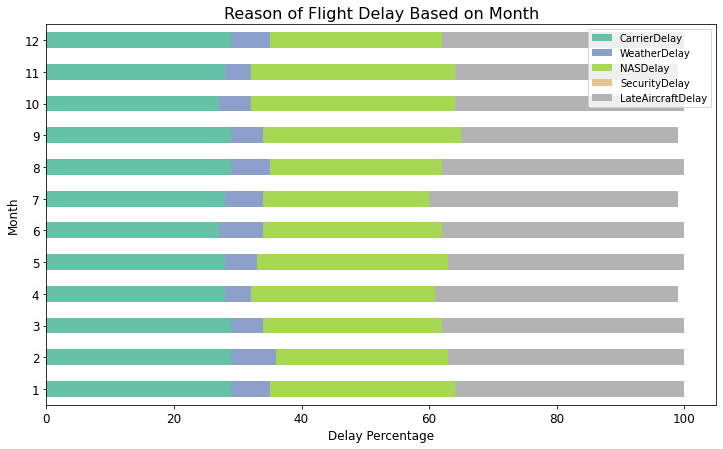

In [64]:
delayMonthReason.plot(kind='barh', figsize=(12,7), stacked=True, fontsize=12, colormap='Set2');
plt.title('Reason of Flight Delay Based on Month', fontsize=16);
plt.xlabel('Delay Percentage', fontsize = 12)
plt.ylabel('Month', fontsize = 12)
plt.legend(loc =1);

plt.savefig('ReasonAvgDelayperMonth.png', transparent = True)

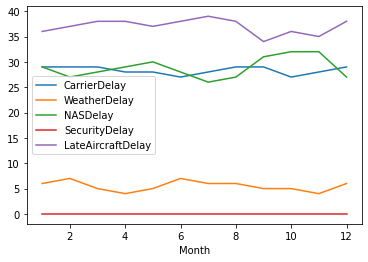

<Figure size 432x288 with 0 Axes>

In [65]:
delayMonthReason.plot(kind='line')
plt.show()

plt.savefig('ReasonAvgDelayperMonthLINE.png', transparent = True)

## Do older planes suffer more delays?

In [21]:
#IMPORT PLANE DATASET
plane = pd.read_csv('plane-data.csv')

In [22]:
#REMOVE NA VALUES 
plane = plane.mask(plane.eq('None')).dropna()
plane

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
34,N10156,Corporation,EMBRAER,02/13/2004,EMB-145XR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2004
35,N102UW,Corporation,AIRBUS INDUSTRIE,05/26/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
36,N10323,Corporation,BOEING,07/01/1997,737-3TO,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1986
37,N103US,Corporation,AIRBUS INDUSTRIE,06/18/1999,A320-214,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1999
38,N104UA,Corporation,BOEING,01/26/1998,747-422,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1998
...,...,...,...,...,...,...,...,...,...
5024,N997DL,Corporation,MCDONNELL DOUGLAS AIRCRAFT CO,03/11/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Fan,1992
5025,N998AT,Corporation,BOEING,01/23/2003,717-200,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2002
5026,N998DL,Corporation,MCDONNELL DOUGLAS CORPORATION,04/02/1992,MD-88,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1992
5027,N999CA,Foreign Corporation,CANADAIR,07/09/2008,CL-600-2B19,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998


In [29]:
#MERGE DF DATA AND PLANE DATA
df3 = df2.merge(plane[['tailnum','year']], left_on='TailNum', right_on='tailnum') #, how='left'
df3

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,tailnum,year
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0,N657AW,1999
1,2006,1,11,3,1913.0,1912,2326.0,2331,US,9,N657AW,193.0,199.0,172.0,-5.0,1.0,PHX,ORD,1440,5,16,0,0,0,0,0,N657AW,1999
2,2006,1,12,4,2355.0,2359,121.0,131,US,374,N657AW,86.0,92.0,58.0,-10.0,-4.0,LAS,OAK,407,5,23,0,0,0,0,0,N657AW,1999
3,2006,1,12,4,724.0,729,1017.0,1019,US,182,N657AW,233.0,230.0,200.0,-2.0,-5.0,ORD,PHX,1440,24,9,0,0,0,0,0,N657AW,1999
4,2006,1,12,4,1305.0,1300,1848.0,1850,US,570,N657AW,223.0,230.0,207.0,-2.0,5.0,PHX,TPA,1788,5,11,0,0,0,0,0,N657AW,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11571200,2007,12,30,7,2003.0,2010,25.0,2345,B6,649,N665JB,442.0,395.0,376.0,40.0,-7.0,JFK,SFO,2586,14,52,0,0,40,0,0,N665JB,2007
11571201,2007,12,31,1,1943.0,1940,2120.0,2110,B6,5,N665JB,97.0,90.0,67.0,10.0,3.0,BUF,JFK,301,16,14,0,0,0,0,0,N665JB,2007
11571202,2007,12,31,1,1716.0,1720,1858.0,1901,B6,6,N665JB,102.0,101.0,61.0,-3.0,-4.0,JFK,BUF,301,4,37,0,0,0,0,0,N665JB,2007
11571203,2007,12,31,1,2155.0,2150,59.0,100,B6,809,N665JB,184.0,190.0,165.0,-1.0,5.0,JFK,FLL,1069,4,15,0,0,0,0,0,N665JB,2007


In [22]:
#save this to csv file for R (memory error)
df3.to_csv(r'C:\Users\USER\Desktop\uni\coursework_flight2.csv', index = False, header = True)

In [30]:
#CHANGE YEAR DATA TYPE TO INT
df3['year'] = df3['year'].astype(int)

#MAKE A COLUMN "AGE"
df3 = df3.assign(Age = df3.Year - df3.year)
df3

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,tailnum,year,Age
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0,N657AW,1999,7
1,2006,1,11,3,1913.0,1912,2326.0,2331,US,9,N657AW,193.0,199.0,172.0,-5.0,1.0,PHX,ORD,1440,5,16,0,0,0,0,0,N657AW,1999,7
2,2006,1,12,4,2355.0,2359,121.0,131,US,374,N657AW,86.0,92.0,58.0,-10.0,-4.0,LAS,OAK,407,5,23,0,0,0,0,0,N657AW,1999,7
3,2006,1,12,4,724.0,729,1017.0,1019,US,182,N657AW,233.0,230.0,200.0,-2.0,-5.0,ORD,PHX,1440,24,9,0,0,0,0,0,N657AW,1999,7
4,2006,1,12,4,1305.0,1300,1848.0,1850,US,570,N657AW,223.0,230.0,207.0,-2.0,5.0,PHX,TPA,1788,5,11,0,0,0,0,0,N657AW,1999,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11571200,2007,12,30,7,2003.0,2010,25.0,2345,B6,649,N665JB,442.0,395.0,376.0,40.0,-7.0,JFK,SFO,2586,14,52,0,0,40,0,0,N665JB,2007,0
11571201,2007,12,31,1,1943.0,1940,2120.0,2110,B6,5,N665JB,97.0,90.0,67.0,10.0,3.0,BUF,JFK,301,16,14,0,0,0,0,0,N665JB,2007,0
11571202,2007,12,31,1,1716.0,1720,1858.0,1901,B6,6,N665JB,102.0,101.0,61.0,-3.0,-4.0,JFK,BUF,301,4,37,0,0,0,0,0,N665JB,2007,0
11571203,2007,12,31,1,2155.0,2150,59.0,100,B6,809,N665JB,184.0,190.0,165.0,-1.0,5.0,JFK,FLL,1069,4,15,0,0,0,0,0,N665JB,2007,0


In [31]:
#DEFINE WHAT IS DELAY
df3['Delayed']= np.where((df3['CarrierDelay']!=0) | (df3['WeatherDelay']!=0) | (df3['NASDelay']!=0)|
                         (df3['SecurityDelay']!=0) | (df3['LateAircraftDelay']!=0), 1, 0)

In [32]:
#FIND AVG DEPARTURE DELAY AND ARRIVAL DELAY BASED ON AGE
df3_age = df3.groupby(['Age']).agg(DepDelayMean = ('DepDelay', np.mean), ArrDelayMean = ('ArrDelay', np.mean))
df3_age = df3_age.reset_index()

In [33]:
df3_age = df3_age[df3_age['Age'] < 25]

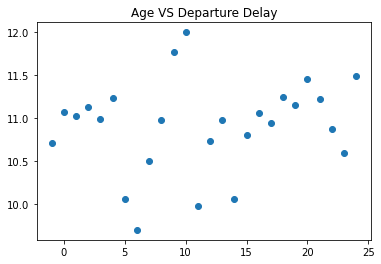

In [35]:
plt.scatter(x='Age', y='DepDelayMean', data=df3_age)
plt.title('Age VS Departure Delay')
plt.show()

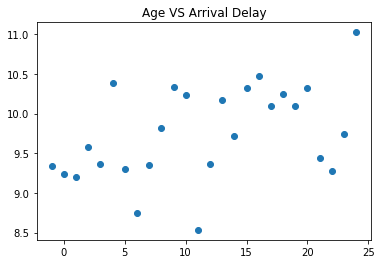

In [36]:
plt.scatter(x='Age', y='ArrDelayMean', data=df3_age)
plt.title('Age VS Arrival Delay')
plt.show()

In [21]:
#look for the correlation between DepDelay and age of plane 
x = df3[['DepDelay', 'ArrDelay', 'Delayed', 'Age']]
correlation = x.corr(method='pearson')
correlation

,DepDelay,ArrDelay,Delayed,Age
DepDelay,1.000000,0.924445,0.582555,-0.001941
ArrDelay,0.924445,1.000000,0.675498,0.000511
Delayed,0.582555,0.675498,1.000000,-0.000193
Age,-0.001941,0.000511,-0.000193,1.000000


In [22]:
a = df3[df3['Age'] <26]

buckets = [0, 5, 10, 20, 25]
buckets_name = ['1', '2', '3', '4']

a['age_cat']=pd.cut(a['Age'].values, buckets , labels = buckets_name)
a

<ipython-input-22-86349fef58ee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['age_cat']=pd.cut(a['Age'].values, buckets , labels = buckets_name)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,tailnum,year,Age,Delayed,age_cat
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0,N657AW,1999,7,0,2
1,2006,1,11,3,1913.0,1912,2326.0,2331,US,9,N657AW,193.0,199.0,172.0,-5.0,1.0,PHX,ORD,1440,5,16,0,0,0,0,0,N657AW,1999,7,0,2
2,2006,1,12,4,2355.0,2359,121.0,131,US,374,N657AW,86.0,92.0,58.0,-10.0,-4.0,LAS,OAK,407,5,23,0,0,0,0,0,N657AW,1999,7,0,2
3,2006,1,12,4,724.0,729,1017.0,1019,US,182,N657AW,233.0,230.0,200.0,-2.0,-5.0,ORD,PHX,1440,24,9,0,0,0,0,0,N657AW,1999,7,0,2
4,2006,1,12,4,1305.0,1300,1848.0,1850,US,570,N657AW,223.0,230.0,207.0,-2.0,5.0,PHX,TPA,1788,5,11,0,0,0,0,0,N657AW,1999,7,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11571200,2007,12,30,7,2003.0,2010,25.0,2345,B6,649,N665JB,442.0,395.0,376.0,40.0,-7.0,JFK,SFO,2586,14,52,0,0,40,0,0,N665JB,2007,0,1,NaN
11571201,2007,12,31,1,1943.0,1940,2120.0,2110,B6,5,N665JB,97.0,90.0,67.0,10.0,3.0,BUF,JFK,301,16,14,0,0,0,0,0,N665JB,2007,0,0,NaN
11571202,2007,12,31,1,1716.0,1720,1858.0,1901,B6,6,N665JB,102.0,101.0,61.0,-3.0,-4.0,JFK,BUF,301,4,37,0,0,0,0,0,N665JB,2007,0,0,NaN
11571203,2007,12,31,1,2155.0,2150,59.0,100,B6,809,N665JB,184.0,190.0,165.0,-1.0,5.0,JFK,FLL,1069,4,15,0,0,0,0,0,N665JB,2007,0,0,NaN


In [31]:
from scipy.stats import chisquare, chi2_contingency, chi2

In [32]:
data_crosstab = pd.crosstab(a['Age'],a['Delayed'], margins = False)
print(data_crosstab)
stat, p, dof, expected = chi2_contingency(data_crosstab)
stat, p, dof, expected

Delayed       0       1
Age                    
-1         1187     361
 0       127699   40379
 1       383547  121912
 2       489377  157305
 3       622836  193763
 4       654360  217177
 5       747433  230750
 6       745858  225472
 7       665811  213995
 8       585843  191973
 9       398238  131220
 10      275015   88128
 11      272489   79149
 12      234859   72691
 13      204719   67854
 14      222893   72973
 15      265640   89944
 16      267670   90787
 17      237064   80226
 18      245174   82399
 19      278389   90620
 20      208792   70248
 21      190823   60070
 22      127307   39063
 23       39586   12148
 24       22161    7339
 25        4434    2391


(3477.3171997960508,
 0.0,
 26,
 array([[1.17229030e+03, 3.75709700e+02],
        [1.27284373e+05, 4.07936272e+04],
        [3.82780803e+05, 1.22678197e+05],
        [4.89728059e+05, 1.56953941e+05],
        [6.18405095e+05, 1.98193905e+05],
        [6.60009284e+05, 2.11527716e+05],
        [7.40771604e+05, 2.37411396e+05],
        [7.35581871e+05, 2.35748129e+05],
        [6.66271343e+05, 2.13534657e+05],
        [5.89034982e+05, 1.88781018e+05],
        [4.00955089e+05, 1.28502911e+05],
        [2.75005825e+05, 8.81371755e+04],
        [2.66293163e+05, 8.53448369e+04],
        [2.32905608e+05, 7.46443917e+04],
        [2.06417754e+05, 6.61552455e+04],
        [2.24057391e+05, 7.18086086e+04],
        [2.69281443e+05, 8.63025569e+04],
        [2.71457147e+05, 8.69998527e+04],
        [2.40281647e+05, 7.70083532e+04],
        [2.48068896e+05, 7.95041044e+04],
        [2.79448108e+05, 8.95608920e+04],
        [2.11315171e+05, 6.77248286e+04],
        [1.89999632e+05, 6.08933681e+04],
  

In [33]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


In [34]:
#another way
#H0: no relationship
#H1: there's a significant relationship

# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


We are using the Pearson’s Chi-Square to test for independence between categorical variables.
As p-value<0.05, H0 will be rejected which means departure delay and arrival delay are not independent to manufacturing year or in other word, OLDER PLANES DO SUFFER MORE DELAY

## How does the number of people flying between different locations change over time?

iata = airport number -> origin or destination code

In [36]:
airports = pd.read_csv('airports.csv')

In [46]:
#merge df dataset with airports data to Destination column
df4 = pd.merge(df2, airports, left_on = 'Dest', right_on = 'iata')

In [47]:
df4

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,iata,airport,city,state,country,lat,long
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,N657AW,281.0,273.0,223.0,6.0,-2.0,ATL,PHX,1587,45,13,0,0,0,0,0,0,0,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,0,0,0,0,0,0,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,0,0,0,0,0,0,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,N312AW,152.0,158.0,126.0,-8.0,-2.0,AUS,PHX,872,16,10,0,0,0,0,0,0,0,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,0,0,0,0,0,0,PHX,Phoenix Sky Harbor International,Phoenix,AZ,USA,33.434167,-112.008056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14279051,2007,12,30,7,2028.0,2000,2053.0,2035,MQ,3775,N906AE,85.0,95.0,70.0,18.0,28.0,DFW,ROW,435,3,12,0,0,18,0,0,0,0,ROW,Roswell Industrial Air Center,Roswell,NM,USA,33.301556,-104.530556
14279052,2007,12,31,1,2041.0,2000,2129.0,2035,MQ,3775,N621AE,108.0,95.0,76.0,54.0,41.0,DFW,ROW,435,10,22,0,0,39,0,13,0,2,ROW,Roswell Industrial Air Center,Roswell,NM,USA,33.301556,-104.530556
14279053,2007,11,29,4,956.0,930,1304.0,1230,9E,5997,80269E,248.0,240.0,214.0,34.0,26.0,JAX,PIR,1395,8,26,0,0,26,0,8,0,0,PIR,Pierre Regional,Pierre,SD,USA,44.382677,-100.285965
14279054,2007,12,3,1,811.0,800,942.0,930,9E,5971,85329E,91.0,90.0,62.0,12.0,11.0,MSP,PIR,350,6,23,0,0,0,0,0,0,0,PIR,Pierre Regional,Pierre,SD,USA,44.382677,-100.285965


In [64]:
Dest6 = df4[df4['Year'] == 2006].groupby(['city']).agg({'iata':'count'})
Dest6 = Dest6.sort_values(by=['iata'], ascending=False).head(10)
Dest6['Year'] = 2006
Dest6

,iata,Year
city,,
Chicago,458295,2006
Atlanta,396741,2006
Dallas-Fort Worth,294388,2006
Houston,274053,2006
New York,230438,2006
Los Angeles,230391,2006
Denver,227466,2006
Phoenix,212184,2006
Las Vegas,183011,2006


In [63]:
Dest7 = df4[df4['Year'] == 2007].groupby(['city']).agg({'iata':'count'})
Dest7 = Dest7.sort_values(by=['iata'], ascending=False).head(10)
Dest7['Year'] = 2007
Dest7

,iata,Year
city,,
Chicago,451427,2007
Atlanta,404971,2007
Dallas-Fort Worth,285765,2007
Houston,252393,2007
New York,237622,2007
Denver,236331,2007
Los Angeles,234050,2007
Phoenix,207723,2007
Las Vegas,181832,2007


In [70]:
Dest = pd.concat([Dest6, Dest7])
Dest = Dest.rename(columns = {'city':'City', 'iata':'Total', 'Year':'Year'})
Dest.reset_index(inplace=True)

In [71]:
Dest

,city,Total,Year
0,Chicago,458295,2006
1,Atlanta,396741,2006
2,Dallas-Fort Worth,294388,2006
3,Houston,274053,2006
4,New York,230438,2006
5,Los Angeles,230391,2006
6,Denver,227466,2006
7,Phoenix,212184,2006
8,Las Vegas,183011,2006
9,Newark,152850,2006


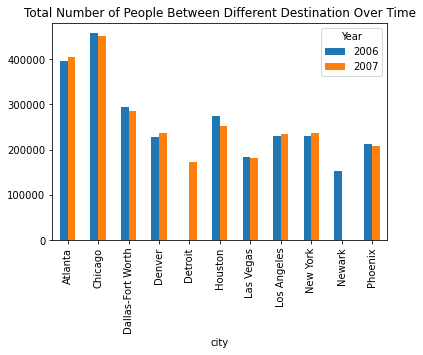

In [73]:
Dest.pivot('city', 'Year', 'Total').plot(kind='bar')
plt.title('Total Number of People Between Different Destination Over Time')
plt.show()

In [74]:
#merge df2 dataset with airports data to Origin column
df5 = pd.merge(df2, airports, left_on = 'Origin', right_on = 'iata')

In [ ]:
Origin6 = df5[df5['Year'] == 2006].groupby(['city']).agg({'iata':'count'})
Origin6 = Origin6.sort_values(by=['iata'], ascending=False).head(10)
Origin6['Year'] = 2006
Origin6

,iata,Year
city,,
Chicago,459587,2006
Atlanta,400433,2006
Dallas-Fort Worth,295110,2006
Houston,275281,2006
New York,230433,2006
Los Angeles,230381,2006
Denver,227637,2006
Phoenix,212634,2006
Las Vegas,182747,2006


In [78]:
Origin7 = df5[df5['Year'] == 2007].groupby(['city']).agg({'iata':'count'})
Origin7 = Origin7.sort_values(by=['iata'], ascending=False).head(10)
Origin7['Year'] = 2007
Origin7

,iata,Year
city,,
Chicago,452795,2007
Atlanta,406136,2007
Dallas-Fort Worth,287373,2007
Houston,253355,2007
New York,238231,2007
Denver,236651,2007
Los Angeles,233939,2007
Phoenix,208203,2007
Las Vegas,181401,2007


In [81]:
Origin = pd.concat([Origin6, Origin7])
Origin = Origin.rename(columns = {'city':'City', 'iata':'Total', 'Year':'Year'})
Origin.reset_index(inplace=True)

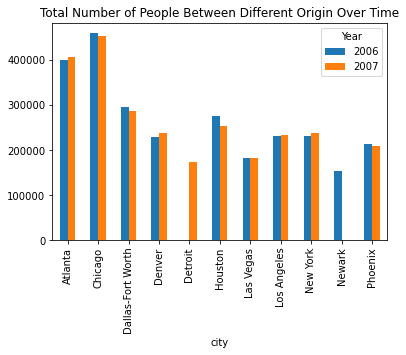

In [83]:
Origin.pivot('city', 'Year', 'Total').plot(kind='bar')
plt.title('Total Number of People Between Different Origin Over Time')
plt.show()

## Can you detect cascading failures as delays in one airport delays in others?

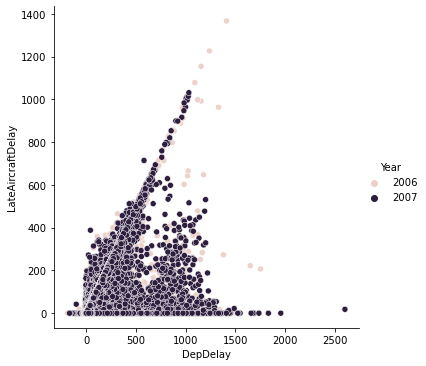

In [16]:
sns.relplot(x='DepDelay', y='LateAircraftDelay', hue='Year', kind='scatter', data= df_filtered)

In [24]:
df2[(df2['Year'] ==2006) & (df2['Month'] ==1) &(df2['DayofMonth'] ==3) & (df2['Origin'] =='FLL') & (df2['Dest'] =='JFK') ]

,index,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
494155,504313,2006,1,3,2,09:07,09:00,11:53,11:40,B6,114,N564JB,166.0,160.0,135.0,13,7,FLL,JFK,1069,9,22,0,0,0,0,0,0,0
494156,504314,2006,1,3,2,19:52,19:20,22:58,22:05,B6,116,N623JB,186.0,165.0,161.0,53,32,FLL,JFK,1069,11,14,0,0,13,0,21,0,19
494157,504315,2006,1,3,2,12:10,11:45,15:08,14:35,B6,12,N553JB,178.0,170.0,153.0,33,25,FLL,JFK,1069,8,17,0,0,0,0,8,0,25
494158,504316,2006,1,3,2,17:33,16:45,20:48,19:30,B6,14,N592JB,195.0,165.0,154.0,78,48,FLL,JFK,1069,19,22,0,0,0,0,49,0,29
494159,504317,2006,1,3,2,10:10,10:10,12:49,12:55,B6,16,N548JB,159.0,165.0,142.0,-6,0,FLL,JFK,1069,7,10,0,0,0,0,0,0,0
494160,504318,2006,1,3,2,20:06,20:00,23:07,22:45,B6,18,N558JB,181.0,165.0,158.0,22,6,FLL,JFK,1069,7,16,0,0,3,0,19,0,0
494161,504319,2006,1,3,2,07:23,07:20,10:03,10:00,B6,26,N507JB,160.0,160.0,135.0,3,3,FLL,JFK,1069,7,18,0,0,0,0,0,0,0
494162,504320,2006,1,3,2,06:18,06:05,08:50,08:45,B6,4,N592JB,152.0,160.0,135.0,5,13,FLL,JFK,1069,7,10,0,0,0,0,0,0,0
494163,504321,2006,1,3,2,13:39,13:15,17:27,16:05,B6,40,N531JB,228.0,170.0,153.0,82,24,FLL,JFK,1069,12,63,0,0,0,0,78,0,4
494164,504322,2006,1,3,2,02:25,21:20,05:13,23:59,B6,50,N519JB,1608.0,159.0,1587.0,-1126,-1135,FLL,JFK,1069,8,13,0,0,5,0,9,0,300


In [15]:
df6 = df2.copy()

In [16]:
df6.sort_values(by = ['Origin', 'Month', 'DayofMonth', 'DepTime'])

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
303706,2006,1,1,7,600.0,600,825.0,823,EV,4620,N870AS,145.0,143.0,107.0,2.0,0.0,ABE,ATL,692,7,31,0,0,0,0,0
118453,2006,1,1,7,728.0,725,853.0,840,YV,7233,N75999,145.0,135.0,116.0,13.0,3.0,ABE,ORD,654,8,21,0,0,0,0,0
270229,2006,1,1,7,805.0,815,935.0,956,US,921,N111UW,90.0,101.0,71.0,-21.0,-10.0,ABE,CLT,481,5,14,0,0,0,0,0
7283361,2007,1,1,1,823.0,830,1020.0,1008,US,1523,N737UW,117.0,98.0,97.0,12.0,-7.0,ABE,CLT,481,5,15,0,0,0,0,0
118451,2006,1,1,7,900.0,915,1016.0,1030,YV,7171,N593ML,136.0,135.0,101.0,-14.0,-15.0,ABE,ORD,654,16,19,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13901459,2007,12,31,1,1723.0,1700,1656.0,1632,OO,5740,N569SW,33.0,32.0,16.0,24.0,23.0,YUM,IPL,58,4,13,24,0,0,0,0
13836369,2007,12,31,1,1740.0,1745,1850.0,1853,YV,2933,N449YV,70.0,68.0,52.0,-3.0,-5.0,YUM,PHX,160,5,13,0,0,0,0,0
6565739,2006,12,31,7,1910.0,1841,2006.0,1945,YV,2850,N991HA,56.0,64.0,40.0,21.0,29.0,YUM,PHX,160,11,5,21,0,0,0,0
6620290,2006,12,31,7,2041.0,2047,2055.0,2059,OO,5777,N229SW,74.0,72.0,60.0,-4.0,-6.0,YUM,LAX,237,4,10,0,0,0,0,0


In [19]:
df6['DepDelayLagged'] = df6.groupby('Origin')['DepDelay'].shift(1)

In [22]:
df6 = df6.dropna(subset=['DepDelay', 'DepDelayLagged'])

In [23]:
df6

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Lagged,DepDelayLagged
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,N834AW,260.0,265.0,214.0,-5.0,0.0,ATL,PHX,1587,27,19,0,0,0,0,0,-2.0,-2.0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,N605AW,235.0,258.0,220.0,-23.0,0.0,ATL,PHX,1587,4,11,0,0,0,0,0,0.0,0.0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,N309AW,171.0,163.0,132.0,0.0,-8.0,AUS,PHX,872,27,12,0,0,0,0,0,-2.0,-2.0
6,2006,1,11,3,825.0,820,1041.0,1021,US,349,N177UW,136.0,121.0,111.0,20.0,5.0,BDL,CLT,644,4,21,0,0,20,0,0,-3.0,-3.0
7,2006,1,11,3,942.0,945,1155.0,1148,US,356,N404US,133.0,123.0,121.0,7.0,-3.0,BDL,CLT,644,4,8,0,0,0,0,0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14279051,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,N670DN,111.0,91.0,80.0,13.0,-7.0,MCO,ATL,403,14,17,0,0,0,0,0,13.0,13.0
14279052,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,N829MH,248.0,254.0,221.0,5.0,11.0,ATL,SLC,1589,6,21,0,0,0,0,0,45.0,45.0
14279053,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,N623DL,266.0,250.0,233.0,15.0,-1.0,LAX,ATL,1946,14,19,0,0,15,0,0,15.0,15.0
14279054,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,N970DL,125.0,127.0,100.0,36.0,38.0,DFW,ATL,732,11,14,0,0,0,0,36,-2.0,-2.0


In [29]:
lagged_df = pd.DataFrame(df6.groupby('DepDelayLagged')['DepDelay'].mean()).reset_index()
lagged_df = lagged_df[lagged_df['DepDelayLagged'] > 0]

In [30]:
lagged_df

,DepDelayLagged,DepDelay
159,1.0,9.857646
160,2.0,10.372245
161,3.0,10.815786
162,4.0,11.182014
163,5.0,11.450791
...,...,...
1386,1736.0,-5.000000
1387,1752.0,6.000000
1388,1831.0,-4.000000
1389,1956.0,-2.000000


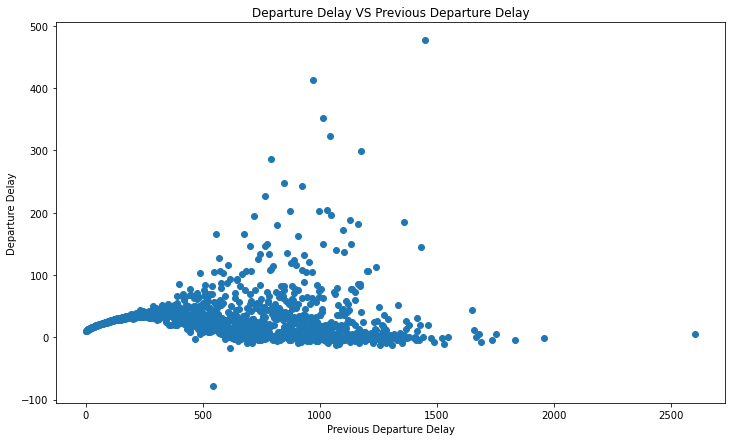

In [32]:
plt.figure(figsize = (12, 7))
plt.scatter(x='DepDelayLagged', y='DepDelay', data=lagged_df)
plt.title('Departure Delay VS Previous Departure Delay')
plt.xlabel('Previous Departure Delay')
plt.ylabel('Departure Delay');
plt.show()

## Model a prediction delay

### Data Preparation

In [22]:
#see missing values
missing_data(df2)
#no more missing values

,Columns,Nbr of Miss,Perc of Miss


In [23]:
#see unique values
{column: len(df2[column].unique()) for column in df2.columns}

{'Year': 2,
 'Month': 12,
 'DayofMonth': 31,
 'DayOfWeek': 7,
 'DepTime': 1552,
 'CRSDepTime': 1214,
 'ArrTime': 1635,
 'CRSArrTime': 1421,
 'UniqueCarrier': 21,
 'FlightNum': 7671,
 'TailNum': 5811,
 'ActualElapsedTime': 771,
 'CRSElapsedTime': 572,
 'AirTime': 890,
 'ArrDelay': 1356,
 'DepDelay': 1391,
 'Origin': 308,
 'Dest': 307,
 'Distance': 1439,
 'TaxiIn': 282,
 'TaxiOut': 351,
 'CarrierDelay': 1162,
 'WeatherDelay': 696,
 'NASDelay': 632,
 'SecurityDelay': 228,
 'LateAircraftDelay': 646}

TailNum and FlightNum has more than 5000 different categorical values so we will remove this columns

In [26]:
df2['TailNum'].nunique()

5811

In [27]:
df2['FlightNum'].nunique()

7671

In [24]:
#remove unwanted columns 
df7 = df2.copy()
df7.drop(['Year', 'TailNum', 'FlightNum'], axis=1, inplace=True)

In [28]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14279056 entries, 0 to 14279055
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Month              int64  
 1   DayofMonth         int64  
 2   DayOfWeek          int64  
 3   DepTime            float64
 4   CRSDepTime         int64  
 5   ArrTime            float64
 6   CRSArrTime         int64  
 7   UniqueCarrier      object 
 8   ActualElapsedTime  float64
 9   CRSElapsedTime     float64
 10  AirTime            float64
 11  ArrDelay           float64
 12  DepDelay           float64
 13  Origin             object 
 14  Dest               object 
 15  Distance           int64  
 16  TaxiIn             int64  
 17  TaxiOut            int64  
 18  CarrierDelay       int64  
 19  WeatherDelay       int64  
 20  NASDelay           int64  
 21  SecurityDelay      int64  
 22  LateAircraftDelay  int64  
dtypes: float64(7), int64(13), object(3)
memory usage: 2.4+ GB


### Feature Selection

In [29]:
df7.columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [ ]:
x = df7['']

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

In [26]:
#APPLY LABEL ENCODER TO CATEGORICAL DATA
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df7['UniqueCarrier'] = labelEncoder.fit_transform(df7['UniqueCarrier'])
df7['Dest'] = labelEncoder.fit_transform(df7['Dest'])
df7['Origin'] = labelEncoder.fit_transform(df7['Origin'])

In [27]:
#mark delayed = 1 if ArrDelay>15
df7['Delayed']= np.where((df7['ArrDelay'] >= 15), 1, 0)

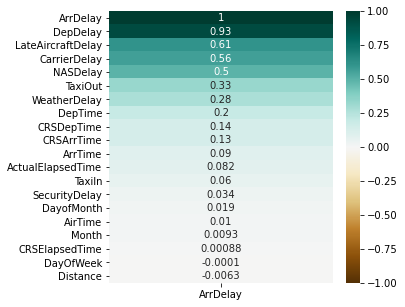

In [37]:
#Correlation heatmap to our target column
plt.figure(figsize = (5,5))
sns.heatmap(df7.corr()[['ArrDelay']].sort_values('ArrDelay',ascending=False), 
            annot=True, 
            cmap = 'BrBG', 
            vmin = -1, vmax = 1);  

<AxesSubplot:>

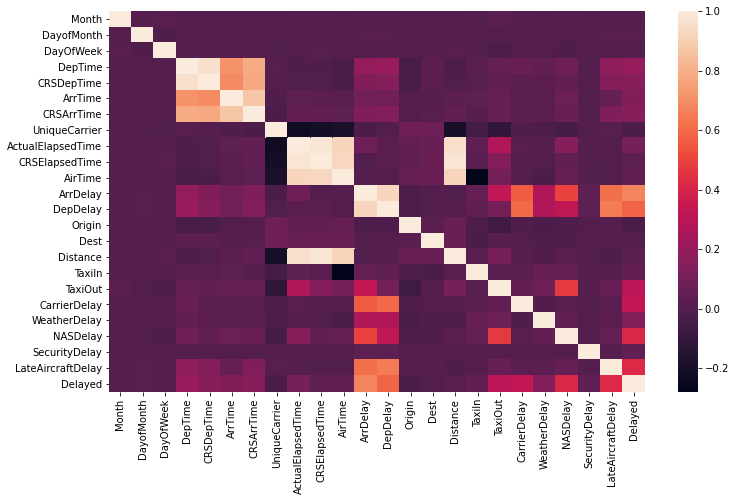

In [24]:
f, ax = plt.subplots(figsize=(12, 7))
corr = df7.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

From the correlation heatmap, one can notice a number of features that are heavily correlated to our target value:
- DepDelay
- LateAircraftDelay
- CarrierDelay
- NASDelay
- WeatherDelay

Thus we will not be using these variables for predicting the delay 

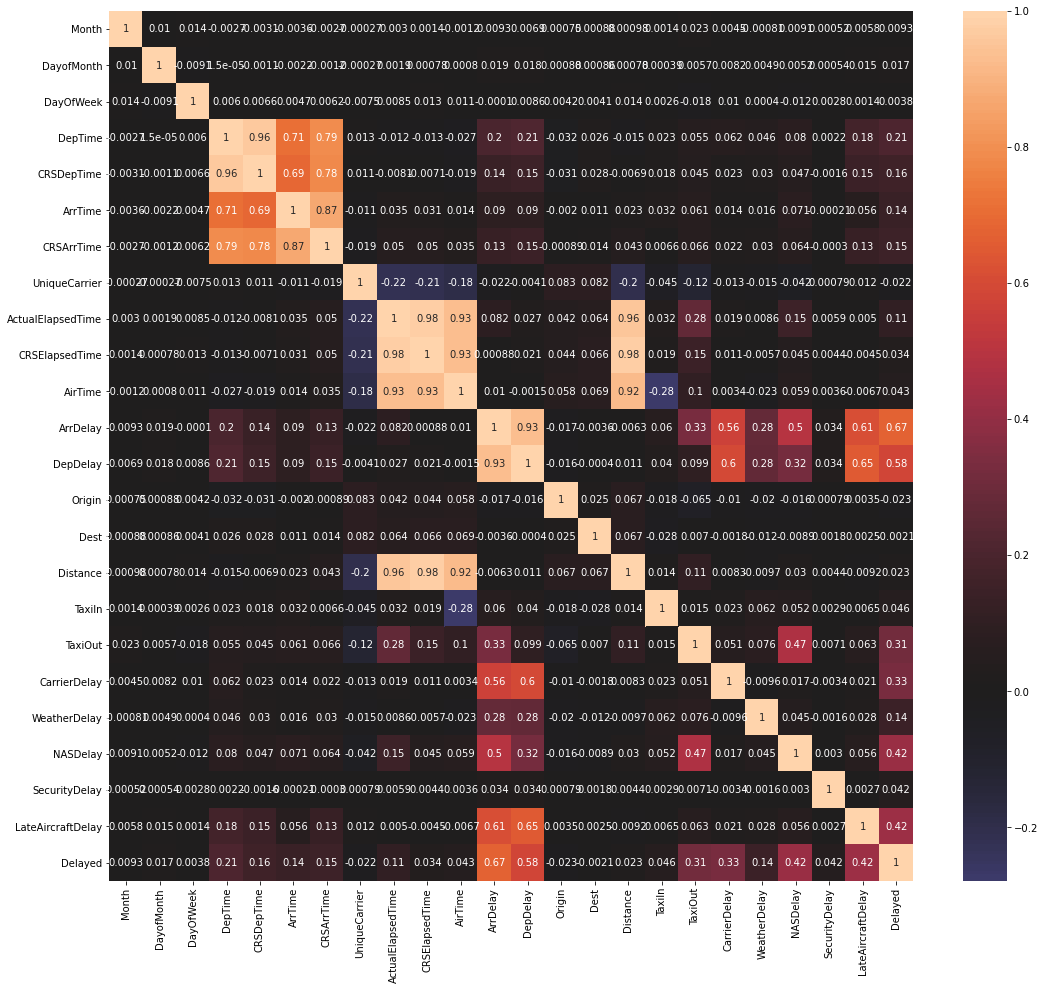

In [25]:
plt.figure(figsize = (18, 16))
sns.heatmap(df7.corr(), annot = True, center = 0)
plt.show()

In [26]:
df7['CarrierDelay']= np.where((df7['CarrierDelay'] > 0), 1, 0)
df7['WeatherDelay']= np.where((df7['WeatherDelay'] > 0), 1, 0)
df7['NASDelay']= np.where((df7['NASDelay'] > 0), 1, 0)
df7['SecurityDelay']= np.where((df7['SecurityDelay'] > 0), 1, 0)
df7['LateAircraftDelay']= np.where((df7['LateAircraftDelay'] > 0), 1, 0)

In [27]:
df7

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed
0,1,11,3,743.0,745,1024.0,1018,17,281.0,273.0,223.0,6.0,-2.0,19,224,1587,45,13,0,0,0,0,0,0
1,1,11,3,1053.0,1053,1313.0,1318,17,260.0,265.0,214.0,-5.0,0.0,19,224,1587,27,19,0,0,0,0,0,0
2,1,11,3,1915.0,1915,2110.0,2133,17,235.0,258.0,220.0,-23.0,0.0,19,224,1587,4,11,0,0,0,0,0,0
3,1,11,3,1753.0,1755,1925.0,1933,17,152.0,158.0,126.0,-8.0,-2.0,21,224,872,16,10,0,0,0,0,0,0
4,1,11,3,824.0,832,1015.0,1015,17,171.0,163.0,132.0,0.0,-8.0,21,224,872,27,12,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14279051,12,15,6,1558.0,1605,1749.0,1736,6,111.0,91.0,80.0,13.0,-7.0,182,19,403,14,17,0,0,0,0,0,0
14279052,12,15,6,1902.0,1851,2110.0,2105,6,248.0,254.0,221.0,5.0,11.0,19,269,1589,6,21,0,0,0,0,0,0
14279053,12,15,6,1024.0,1025,1750.0,1735,6,266.0,250.0,233.0,15.0,-1.0,163,19,1946,14,19,0,0,1,0,0,1
14279054,12,15,6,1353.0,1315,1658.0,1622,6,125.0,127.0,100.0,36.0,38.0,83,19,732,11,14,0,0,0,0,1,1


In [28]:
df7['Delayed'].value_counts()

0    10860209
1     3418847
Name: Delayed, dtype: int64

In [29]:
#DROP IRRELEVANT COLUMNS 
df7.drop(['CRSDepTime','CRSArrTime','CRSElapsedTime', 'ArrDelay', 'DepDelay'], axis = 1, inplace=True)

In [30]:
#DROP IRRELEVANT COLUMNS (2)
df7.drop(['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1, inplace=True)

In [31]:
#split into x and y
y = df7['Delayed']
x = df7.drop('Delayed', axis=1)

In [32]:
# splitting into train and test data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [33]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
x_train_sc = stdScaler.fit_transform(x_train)
x_test_sc = stdScaler.transform(x_test)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import plot_confusion_matrix

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()

In [37]:
lr.fit(x_train_sc, y_train)
y_pred_lr = lr.predict(x_test_sc)

In [38]:
compare1 = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred_lr})
compare1

,Actual,Prediction
1338989,0,0
1231189,0,0
4539496,1,0
1921260,1,0
9288434,0,0
...,...,...
7430292,0,0
740891,0,0
1265746,0,0
77968,0,0


In [39]:
confusion_matrix(y_test, y_pred_lr)

array([[2102384,   69393],
       [ 510046,  173989]], dtype=int64)

              precision    recall  f1-score   support

           0       0.80      0.97      0.88   2171777
           1       0.71      0.25      0.38    684035

    accuracy                           0.80   2855812
   macro avg       0.76      0.61      0.63   2855812
weighted avg       0.78      0.80      0.76   2855812



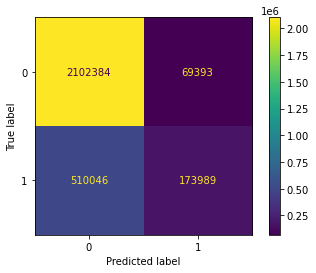

In [40]:
print(classification_report(y_test, y_pred_lr))
plot_confusion_matrix(lr, x_test_sc, y_test, values_format='d')

In [49]:
from sklearn import metrics

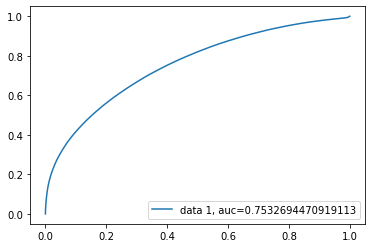

In [50]:
y_pred_proba = lr.predict_proba(x_test_sc)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [51]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Hyperparameter Tuning

In [41]:
#import gridsearch
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV #trial randomized search

In [57]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinier', 'sag', 'saga']
max_iter = [1,10,100,1000,10000]

param = {'penalty':penalty, 'solver':solver, 'max_iter':max_iter}
param

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinier', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

In [61]:
model_lr = LogisticRegression()
model_lr_rs = RandomizedSearchCV(estimator = model_lr, param_distributions = param, cv =5)

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
model_lr_rs.fit(x_train_sc, y_train)
model_lr_rs.best_params_

{'solver': 'newton-cg', 'penalty': 'none', 'max_iter': 10000}

In [65]:
df7

,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,ActualElapsedTime,AirTime,Origin,Dest,Distance,TaxiIn,TaxiOut,Delayed
0,1,11,3,743.0,1024.0,17,281.0,223.0,19,224,1587,45,13,0
1,1,11,3,1053.0,1313.0,17,260.0,214.0,19,224,1587,27,19,0
2,1,11,3,1915.0,2110.0,17,235.0,220.0,19,224,1587,4,11,0
3,1,11,3,1753.0,1925.0,17,152.0,126.0,21,224,872,16,10,0
4,1,11,3,824.0,1015.0,17,171.0,132.0,21,224,872,27,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14279051,12,15,6,1558.0,1749.0,6,111.0,80.0,182,19,403,14,17,0
14279052,12,15,6,1902.0,2110.0,6,248.0,221.0,19,269,1589,6,21,0
14279053,12,15,6,1024.0,1750.0,6,266.0,233.0,163,19,1946,14,19,1
14279054,12,15,6,1353.0,1658.0,6,125.0,100.0,83,19,732,11,14,1


In [70]:
best_lr = LogisticRegression(solver='newton-cg', penalty='none', max_iter=10000)
best_lr.fit(x_train_sc, y_train)

LogisticRegression(max_iter=10000, penalty='none', solver='newton-cg')

In [71]:
y_pred_best = best_lr.predict(x_test_sc)

              precision    recall  f1-score   support

           0       0.80      0.97      0.88   2171777
           1       0.71      0.25      0.38    684035

    accuracy                           0.80   2855812
   macro avg       0.76      0.61      0.63   2855812
weighted avg       0.78      0.80      0.76   2855812



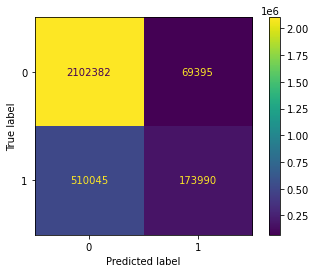

In [73]:
print(classification_report(y_test, y_pred_best))
plot_confusion_matrix(best_lr, x_test_sc, y_test, values_format='d')